# Capstone 2: EDA (Match Winner Predictor)

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

### Individual Player File

In [2]:
df_individual = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/df_individual.csv')
df_individual.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
df_individual.head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,map,...,deaths_ct,kddiff_ct,adr_ct,kast_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,match_outcome
0,2020-02-27,Andersin,Thunder Logic,Station7,United States,14038,2339816,5151,ESEA MDL Season 33 North America,Overpass,...,2,1,145.7,100.0,18,8,10,118.1,86.7,Win
1,2020-02-27,FrostayK,Station7,Thunder Logic,United States,12090,2339816,5151,ESEA MDL Season 33 North America,Overpass,...,13,-5,62.5,60.0,1,3,-2,12.3,33.3,Loss
2,2020-02-27,Inseaniac,Thunder Logic,Station7,Canada,18623,2339816,5151,ESEA MDL Season 33 North America,Overpass,...,0,5,192.3,100.0,15,7,8,80.8,86.7,Win
3,2020-02-27,PureR,Thunder Logic,Station7,United States,10622,2339816,5151,ESEA MDL Season 33 North America,Overpass,...,0,4,63.7,100.0,14,9,5,96.5,86.7,Win
4,2020-02-27,Sharkie,Thunder Logic,Station7,United States,19476,2339816,5151,ESEA MDL Season 33 North America,Overpass,...,0,3,58.3,100.0,10,7,3,77.9,86.7,Win


In [3]:
df_individual.shape

(130502, 30)

### Team Player File

In [4]:
df_team = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/df_team.csv')
df_team.head()

,match_id,team,date,opponent,event_name,map,kills,assists,deaths,hs,...,deaths_ct,kddiff_ct,adr_ct,kast_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,match_outcome
0,2299001,Dignitas,2015-11-03,NiP,ESL ESEA Pro League Season 2,Train,10.2,2.0,17.8,3.8,...,8.6,-4.0,78.133799,71.432949,4.8,8.6,-4.0,71.627147,67.267077,Loss
1,2299001,NiP,2015-11-03,Dignitas,ESL ESEA Pro League Season 2,Train,17.8,3.4,10.2,7.4,...,4.8,3.6,78.133799,71.432949,8.8,4.8,3.6,71.627147,67.267077,Win
2,2299003,Envy,2015-11-03,NiP,ESL ESEA Pro League Season 2,Cobblestone,16.4,4.2,19.2,6.6,...,9.4,-1.6,78.133799,71.432949,8.0,9.4,-1.6,71.627147,67.267077,Loss
3,2299003,NiP,2015-11-03,Envy,ESL ESEA Pro League Season 2,Cobblestone,19.2,2.2,16.4,9.8,...,7.8,1.2,78.133799,71.432949,9.4,7.8,1.2,71.627147,67.267077,Win
4,2299011,CLG,2015-11-04,Liquid,ESL ESEA Pro League Season 2,Inferno,20.4,5.4,16.8,5.2,...,8.2,1.6,78.133799,71.432949,10.0,8.2,1.6,71.627147,67.267077,Win


In [5]:
df_team.shape

(26673, 26)

## Splitting the Data by Win/Loss

In [6]:
# Create a dataframe for individual player performance that resulted in wins.
df_individual_win = df_individual[df_individual.match_outcome == 'Win']
df_individual_win.sample(5)

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,map,...,deaths_ct,kddiff_ct,adr_ct,kast_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,match_outcome
64059,2018-02-27,NBK-,G2,Virtus.pro,France,7168,2320064,3309,IEM Katowice 2018,Nuke,...,12,-5,59.4,60.0,12,7,5,91.8,92.3,Win
1594,2020-02-09,thief,Divine,Infinity,United States,13576,2339340,5176,Americas Minor North America Open Qualifier 3 ...,Dust2,...,6,4,121.6,100.0,11,8,3,68.1,60.0,Win
116539,2016-10-19,TACO,SK,HellRaisers,Brazil,9217,2305806,2410,EPICENTER: Moscow,Cobblestone,...,6,-5,34.9,42.9,12,6,6,82.5,93.3,Win
95124,2017-06-30,HEN1,Immortals,Dignitas,Brazil,8565,2311882,2721,PGL Major Krakow 2017 Main Qualifier,Cache,...,7,7,107.7,86.7,10,11,-1,69.4,57.1,Win
38213,2018-09-26,DickStacy,Grayhound,Vizard,Australia,12876,2326919,3966,ESEA MDL Season 29 Australia,Nuke,...,6,2,74.9,87.5,12,10,2,72.1,80.0,Win


In [7]:
# Create a dataframe for individual player performance that resulted in losses.
df_individual_loss = df_individual[df_individual.match_outcome == 'Loss']
df_individual_loss.sample(5)

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,map,...,deaths_ct,kddiff_ct,adr_ct,kast_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,match_outcome
54970,2018-04-11,seized,Gambit,FaZe,Russia,3347,2321432,3601,ECS Season 5 Europe,Mirage,...,13,-5,58.2,53.3,1,3,-2,42.0,33.3,Loss
7008,2019-10-15,Thomas,Phoenix,HAVU,United Kingdom,13018,2337024,4736,ESEA MDL Season 32 Europe,Train,...,9,-2,66.9,66.7,8,7,1,75.9,70.0,Loss
922,2020-02-18,Jyo,Nemiga,Sprout,Estonia,12269,2339632,5150,ESEA MDL Season 33 Europe,Vertigo,...,8,-2,30.1,66.7,3,13,-10,39.1,66.7,Loss
24104,2019-01-31,Spiidi,Sprout,Winstrike,Germany,7499,2330581,4351,IEM Sydney 2019 Europe Open Qualifier 1,Dust2,...,10,-6,48.9,58.3,13,12,1,100.1,80.0,Loss
104975,2017-03-30,mizu,Alpha Sydney,AVANT,Australia,9118,2308278,2674,ESL Australia & NZ Championship Season 3,Overpass,...,11,-3,90.1,60.0,3,5,-2,64.4,60.0,Loss


In [8]:
# Create a dataframe for team player performance that resulted in wins.
df_team_win = df_team[df_team.match_outcome == 'Win']
df_team_win.sample(5)

,match_id,team,date,opponent,event_name,map,kills,assists,deaths,hs,...,deaths_ct,kddiff_ct,adr_ct,kast_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,match_outcome
5276,2308922,PENTA,2017-03-21,Spirit,ESEA MDL Season 24 Europe,Train,21.8,5.2,19.0,8.8,...,8.8,2.6,79.16,70.66,10.4,10.2,0.2,79.30,74.66,Win
6369,2310535,NiP,2017-05-11,HellRaisers,ESL Pro League Season 5 Europe,Train,20.8,5.4,20.2,6.8,...,7.4,6.2,91.80,83.98,7.2,12.8,-5.6,59.26,56.00,Win
16454,2322973,Windigo,2018-05-17,GameAgents,Esports Balkan League Season 2,Inferno,20.8,5.8,18.6,10.8,...,10.8,-3.2,68.24,60.00,13.2,7.8,5.4,90.46,80.00,Win
2430,2304990,Renegades,2016-09-23,nxl,eXTREMESLAND 2016 Asia Finals,Train,15.8,3.0,6.6,5.4,...,5.6,8.2,93.00,88.00,2.0,1.0,1.0,100.00,100.00,Win
1854,2304209,Liquid,2016-08-30,SK,ESL Pro League Season 4 - North America,Cobblestone,20.8,4.0,12.8,9.2,...,8.8,2.4,82.10,80.00,9.6,4.0,5.6,91.38,87.26,Win


In [9]:
# Create a dataframe for team player performance that resulted in losses.
df_team_loss = df_team[df_team.match_outcome == 'Loss']
df_team_loss.sample(5)

,match_id,team,date,opponent,event_name,map,kills,assists,deaths,hs,...,deaths_ct,kddiff_ct,adr_ct,kast_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,match_outcome
20931,2328591,Breakaway,2018-10-31,TRIDENT,ESEA MDL Season 29 Australia,Inferno,18.0,4.2,19.8,8.6,...,10.6,-1.0,71.66,66.66,8.4,9.2,-0.8,78.96,76.66,Loss
17626,2324556,iGame.com,2018-07-03,Wind and Rain,ESEA MDL Season 28 Europe,Cache,17.8,5.2,18.8,6.4,...,9.8,-0.2,75.20,68.00,8.2,9.0,-0.8,68.60,67.14,Loss
11819,2317087,Invictus Aquilas,2017-11-10,Spirit,ESEA MDL Season 26 Europe,Nuke,16.2,2.6,19.4,9.0,...,9.8,1.4,80.74,76.00,5.0,9.6,-4.6,54.50,52.70,Loss
14736,2320499,PRIDE,2018-03-08,ALTERNATE aTTaX,Hellcase Cup 7,Nuke,14.2,2.8,19.4,6.2,...,6.6,-1.8,69.70,57.50,9.4,12.8,-3.4,68.36,54.66,Loss
19908,2327680,NRG,2018-11-15,Cloud9,ESL Pro League Season 8 North America,Mirage,17.4,4.2,18.8,7.4,...,11.8,-3.2,63.36,65.32,8.8,7.0,1.8,78.28,76.66,Loss


## Taking a Closer Look at the Individual Player Data

### Individual Player Performance - Win

In [10]:
# Summary statistics for wins.
df_individual_win.describe().T

,count,mean,std,min,25%,50%,75%,max
player_id,65704.0,8.797191e+03,4049.436630,7.0,7403.0,9030.0,11287.0,19988.0
match_id,65704.0,2.319656e+06,10325.985273,2300412.0,2311278.0,2319487.0,2327781.0,2339828.0
event_id,65704.0,3.415093e+03,779.477791,1690.0,2767.0,3374.0,3965.0,5224.0
kills,65704.0,1.972221e+01,5.597297,0.0,16.0,19.0,23.0,63.0
assists,65704.0,4.602186e+00,2.475996,0.0,3.0,4.0,6.0,20.0
deaths,65704.0,1.561666e+01,5.147700,0.0,12.0,15.0,19.0,57.0
hs,65704.0,8.803817e+00,3.856467,0.0,6.0,8.0,11.0,39.0
flash_assists,65704.0,1.126202e+00,1.202681,0.0,0.0,1.0,1.0,12.0
kast,65704.0,7.647433e+01,9.087857,40.7,70.0,76.2,82.6,100.0
kddiff,65704.0,4.105549e+00,6.200954,-23.0,0.0,4.0,8.0,31.0


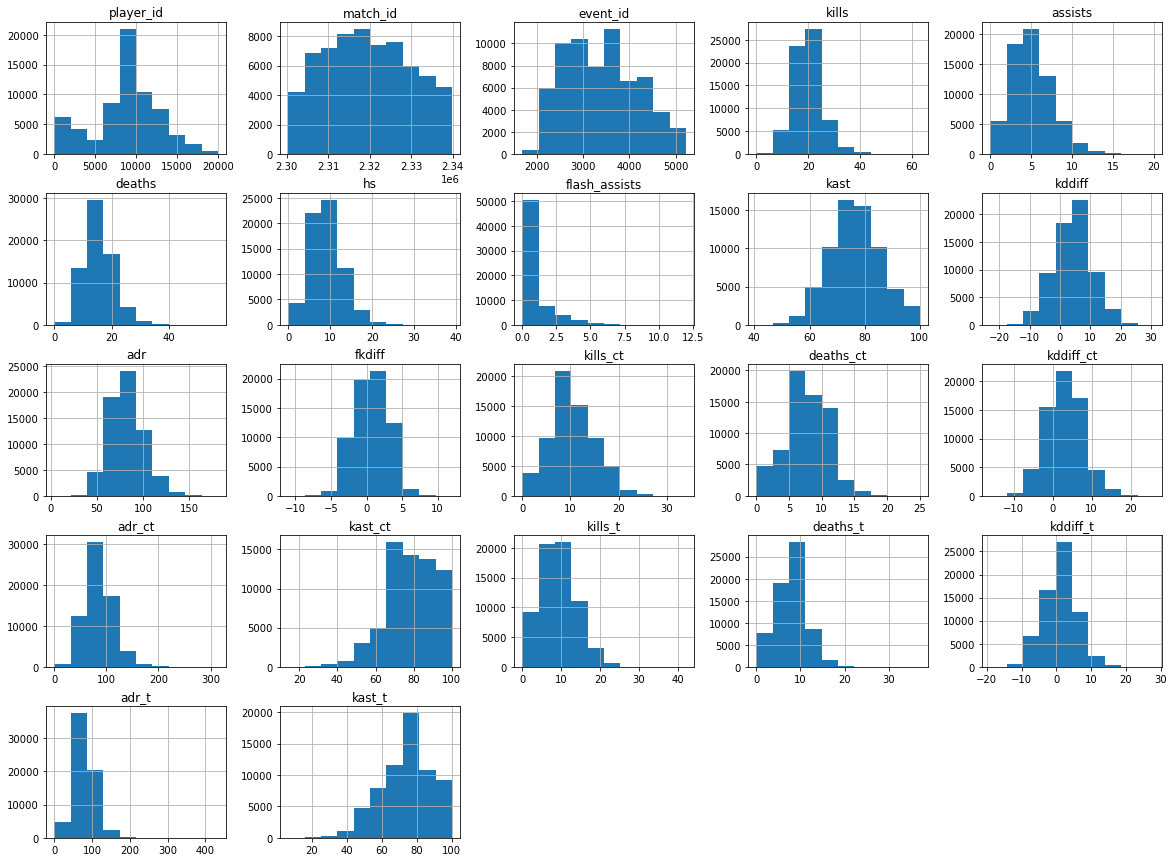

In [11]:
# Histogram for individual win features.
_ = df_individual_win.hist(bins = 10, figsize = (20,15))

Now we want to look closer at some of the categorical features in our data. We'll look at 'country' and 'map'. We are not interested in 'date', 'player_name', 'team', 'opponent', 'event_name', or 'match_outcome'. **Note:** While 'team' and 'opponent' likely impact the outcome of a match, we are not interested in how strength level of teams/opponents impact match outcomes, but rather just the match statistics.

<AxesSubplot:xlabel='country', ylabel='count'>

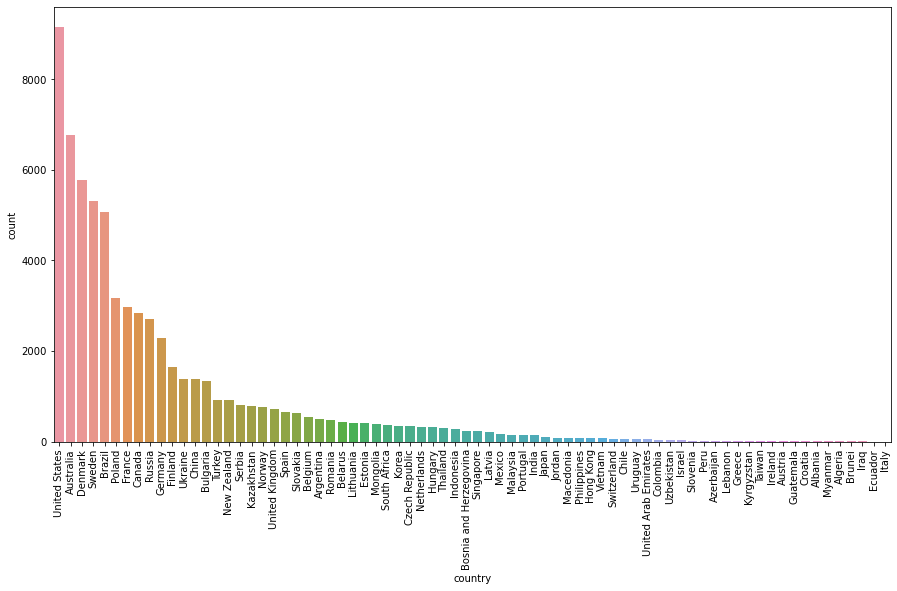

In [12]:
# Create a copy of the individual win dataframe only containing the categorical features.
df_individual_win_cat = df_individual_win.select_dtypes(include = 'object').copy()

# Countplot for the 'country' feature.
fig, ax = plt.subplots(figsize = (15,8))
plt.xticks(rotation = 90)
sns.countplot(data = df_individual_win_cat, x = 'country', order = df_individual_win_cat['country'].value_counts().index)

<AxesSubplot:xlabel='map', ylabel='count'>

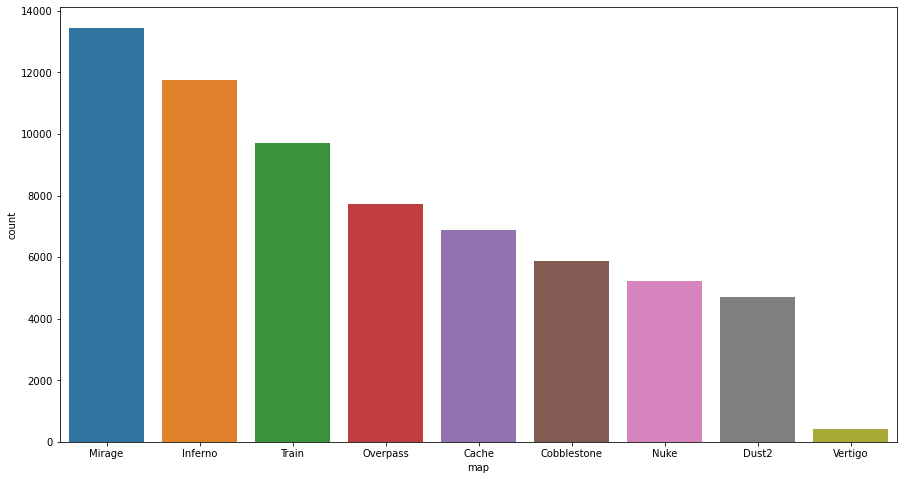

In [13]:
# Countplot for the 'map' feature.
fig, ax = plt.subplots(figsize = (15,8))
sns.countplot(data = df_individual_win_cat, x = 'map', order = df_individual_win_cat['map'].value_counts().index)

<AxesSubplot:>

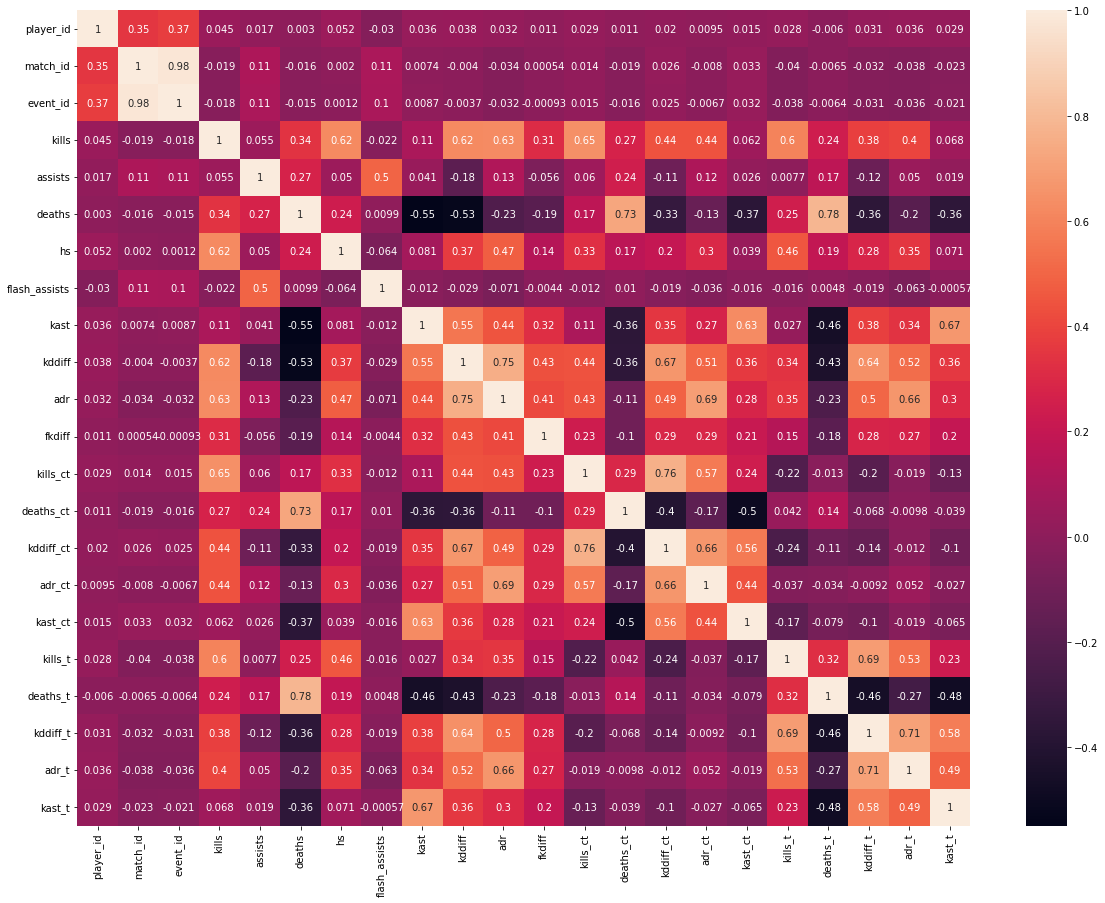

In [14]:
# Correlation heatmap
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_individual_win.corr(), annot = True)

It is worth noting that many of these features that have high correlation with other features are expected due to how they are calculated. For example, we would expect 'deaths' and 'deaths_ct' to be highly correlated (0.73) since the 'deaths' feature is simply 'deaths_t' + 'deaths_ct'.

### Individual Player Performance - Loss

In [15]:
# Summary statistics for losses.
df_individual_loss.describe().T

,count,mean,std,min,25%,50%,75%,max
player_id,64798.0,9.272290e+03,4288.708116,2.0,7511.0,9217.0,11941.0,19995.0
match_id,64798.0,2.319658e+06,10329.356033,2300412.0,2311279.0,2319489.0,2327784.0,2339828.0
event_id,64798.0,3.415135e+03,779.548728,1690.0,2767.0,3374.0,3965.0,5224.0
kills,64798.0,1.570829e+01,6.277097,0.0,11.0,15.0,19.0,75.0
assists,64798.0,3.658770e+00,2.316088,0.0,2.0,3.0,5.0,20.0
deaths,64798.0,1.979293e+01,3.334349,1.0,18.0,19.0,21.0,53.0
hs,64798.0,7.240733e+00,3.717869,0.0,5.0,7.0,9.0,38.0
flash_assists,64798.0,8.992099e-01,1.026350,0.0,0.0,1.0,1.0,13.0
kast,64798.0,6.222113e+01,10.480079,15.8,55.6,63.0,69.6,100.0
kddiff,64798.0,-4.084632e+00,5.553786,-26.0,-8.0,-5.0,-1.0,30.0


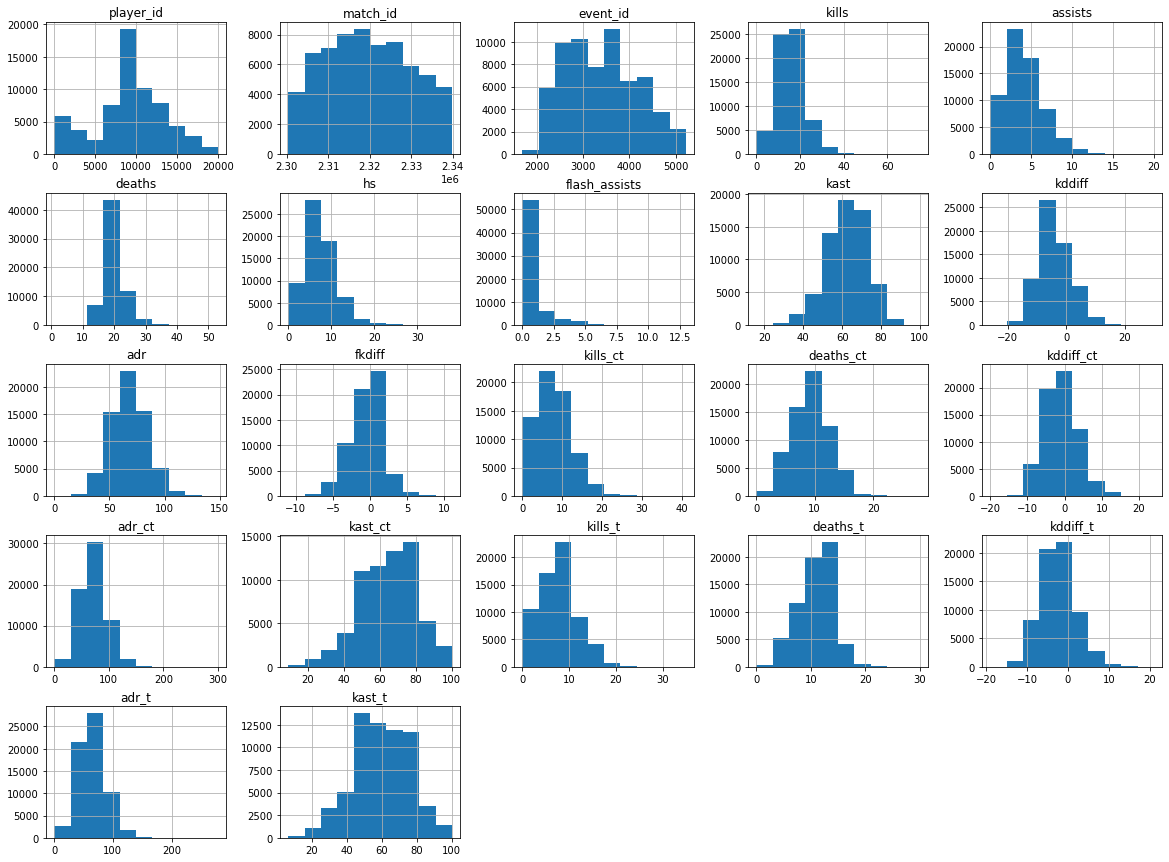

In [16]:
# Histogram for individual loss features.
_ = df_individual_loss.hist(bins = 10, figsize = (20,15))

Now we want to look closer at some of the categorical features in our data. We'll look at 'country' and 'map'. We are not interested in 'date', 'player_name', 'team', 'opponent', 'event_name', or 'match_outcome'. **Note:** While 'team' and 'opponent' likely impact the outcome of a match, we are not interested in how strength level of teams/opponents impact match outcomes, but rather just the match statistics.

<AxesSubplot:xlabel='country', ylabel='count'>

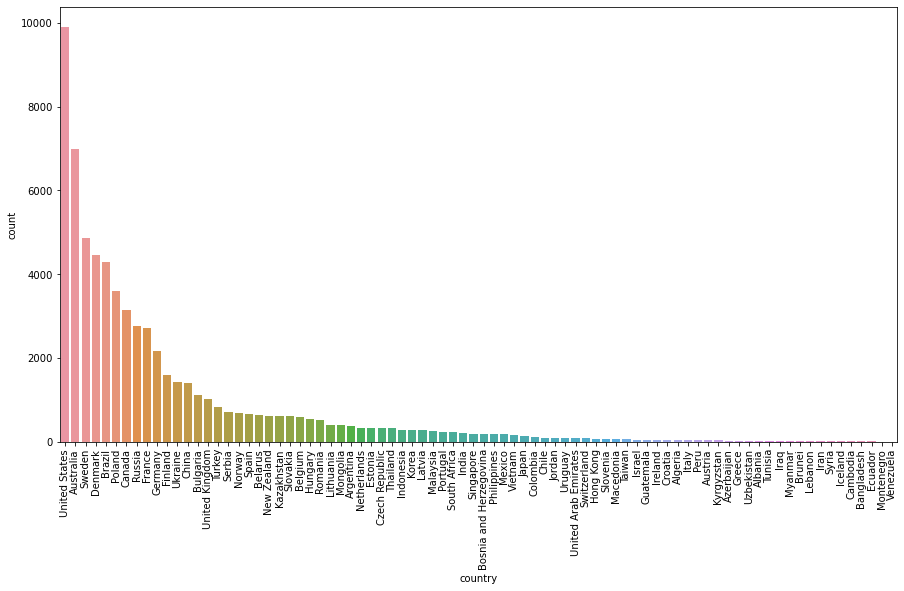

In [17]:
# Create a copy of the individual loss dataframe only containing the categorical features.
df_individual_loss_cat = df_individual_loss.select_dtypes(include = 'object').copy()

# Countplot for the 'country' feature.
fig, ax = plt.subplots(figsize = (15,8))
plt.xticks(rotation = 90)
sns.countplot(data = df_individual_loss_cat, x = 'country', order = df_individual_loss_cat['country'].value_counts().index)

<AxesSubplot:xlabel='map', ylabel='count'>

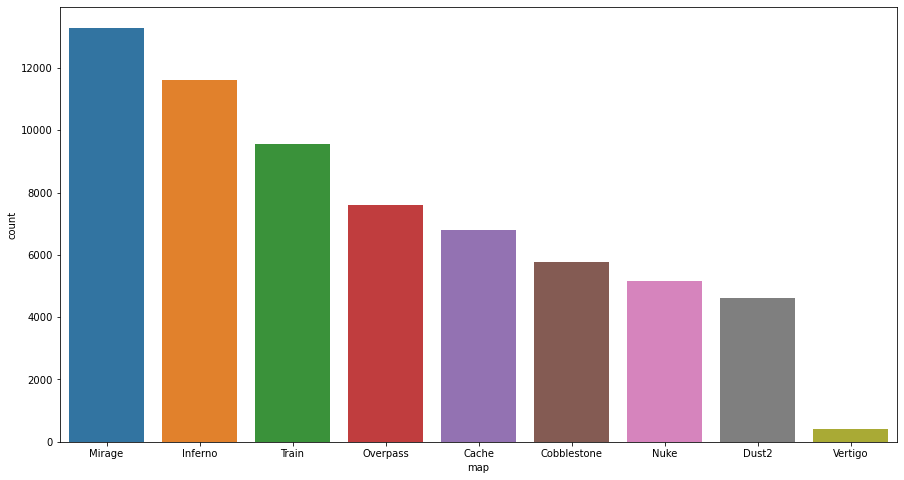

In [18]:
# Countplot for the 'map' feature.
fig, ax = plt.subplots(figsize = (15,8))
sns.countplot(data = df_individual_loss_cat, x = 'map', order = df_individual_loss_cat['map'].value_counts().index)

<AxesSubplot:>

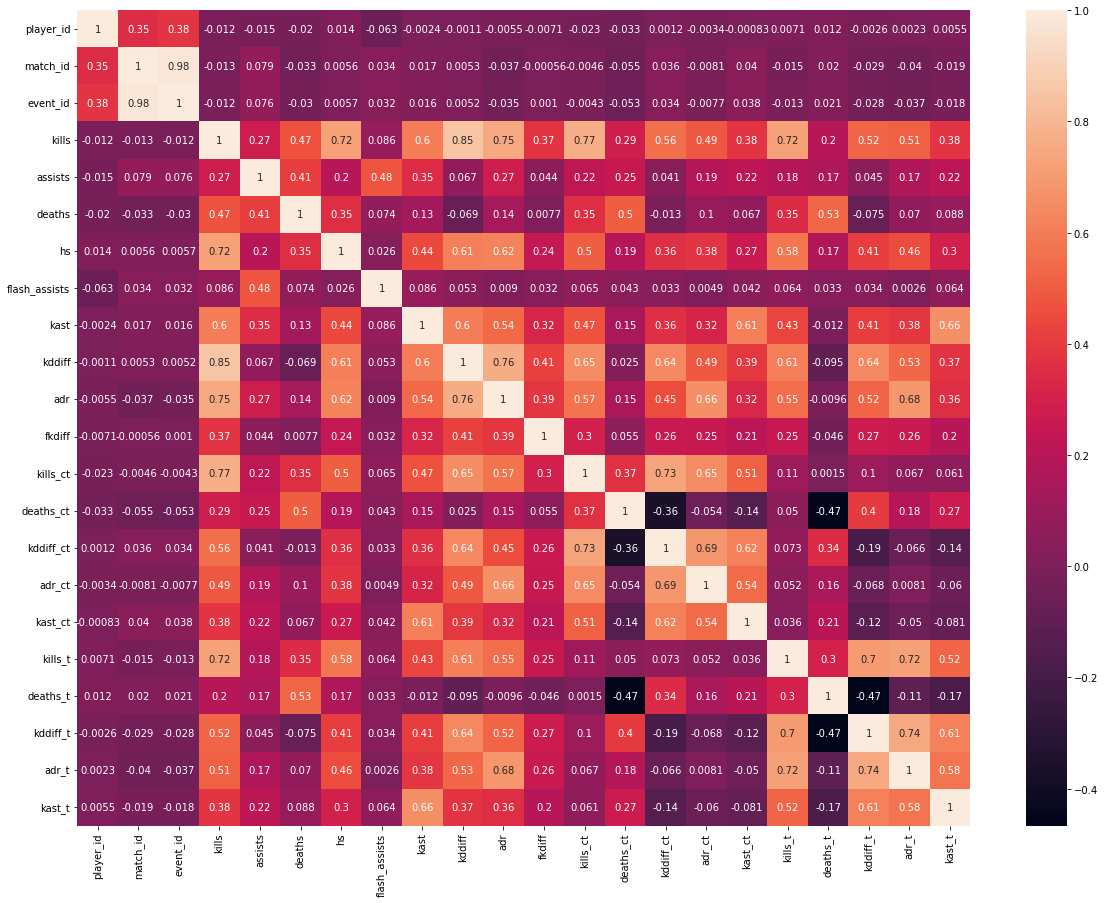

In [19]:
# Correlation heatmap
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_individual_loss.corr(), annot = True)

It is worth noting that many of these features that have high correlation with other features are expected due to how they are calculated. For example, we would expect 'kills' and 'kills_ct' to be highly correlated (0.77) since the 'kills' feature is simply 'kills_t' + 'kills_ct'.

### Individual Player Performance - Boxplot/Countplot/Scatterplot Comparisons

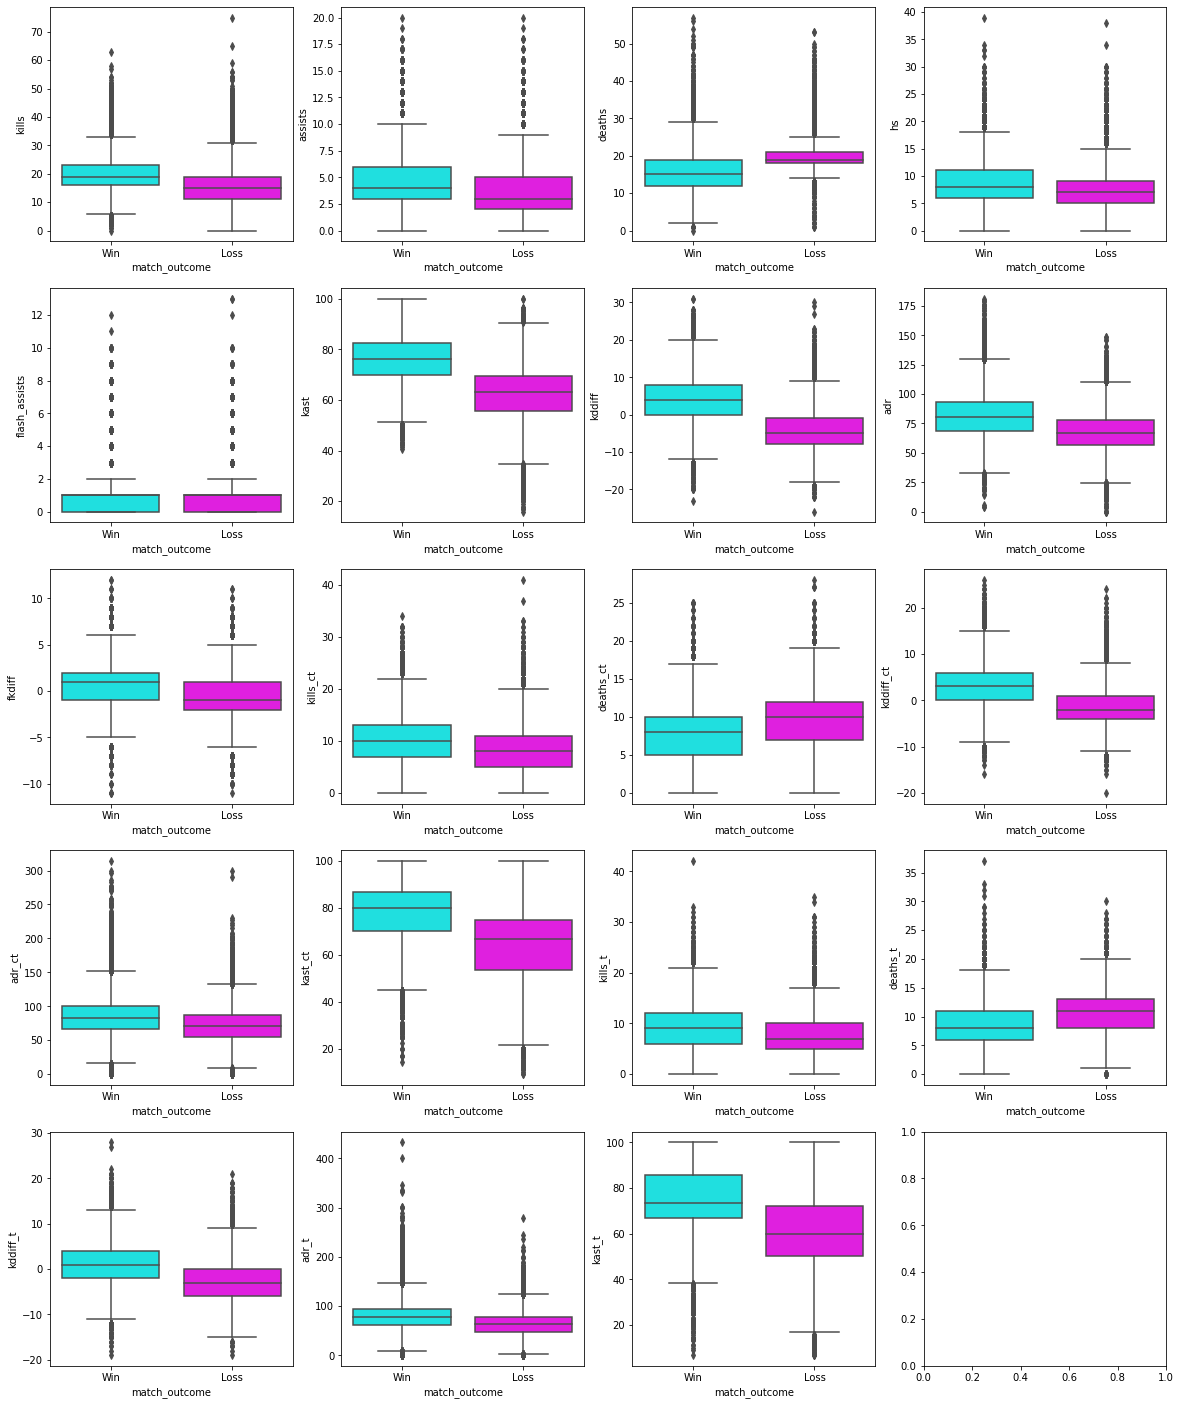

In [20]:
# Side-by-side boxplots by 'match_outcome' (numerical feature comparisons).
fig, ax = plt.subplots(5, 4, figsize = (20,25))

colors = ['cyan', 'magenta']
_ = sns.boxplot(ax = ax[0,0], x = 'match_outcome', y = 'kills', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[0,1], x = 'match_outcome', y = 'assists', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[0,2], x = 'match_outcome', y = 'deaths', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[0,3], x = 'match_outcome', y = 'hs', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[1,0], x = 'match_outcome', y = 'flash_assists', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[1,1], x = 'match_outcome', y = 'kast', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[1,2], x = 'match_outcome', y = 'kddiff', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[1,3], x = 'match_outcome', y = 'adr', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[2,0], x = 'match_outcome', y = 'fkdiff', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[2,1], x = 'match_outcome', y = 'kills_ct', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[2,2], x = 'match_outcome', y = 'deaths_ct', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[2,3], x = 'match_outcome', y = 'kddiff_ct', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[3,0], x = 'match_outcome', y = 'adr_ct', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[3,1], x = 'match_outcome', y = 'kast_ct', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[3,2], x = 'match_outcome', y = 'kills_t', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[3,3], x = 'match_outcome', y = 'deaths_t', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[4,0], x = 'match_outcome', y = 'kddiff_t', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[4,1], x = 'match_outcome', y = 'adr_t', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[4,2], x = 'match_outcome', y = 'kast_t', data = df_individual, palette = colors)

The deaths boxplot shows that the individual players who lost matches vary less in amount of deaths than that of who won matches.

We can also see that in the flash_assists boxplot, the distributions look quite similar for both the win and loss data. This implies that it might not be that useful in predicting match outcomes.

Looking at the kast and kddiff boxplots, we see that 1st quartile of the win data is roughly equal to the 3rd quartile of the loss data. This is important to mention as 75% of the win data is above 75% of the loss data, suggesting that there is a difference in the two datasets.

Most of the other plots show roughly what we would expect in terms of how the win data should differ from the loss data. All outliers in the boxplots appear to be feasible abnormal events. This should be somewhat expected which as much data as we have.

C:\Users\justi\AppData\Local\Temp/ipykernel_28544/2174944295.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_individual['country'], rotation = 90)


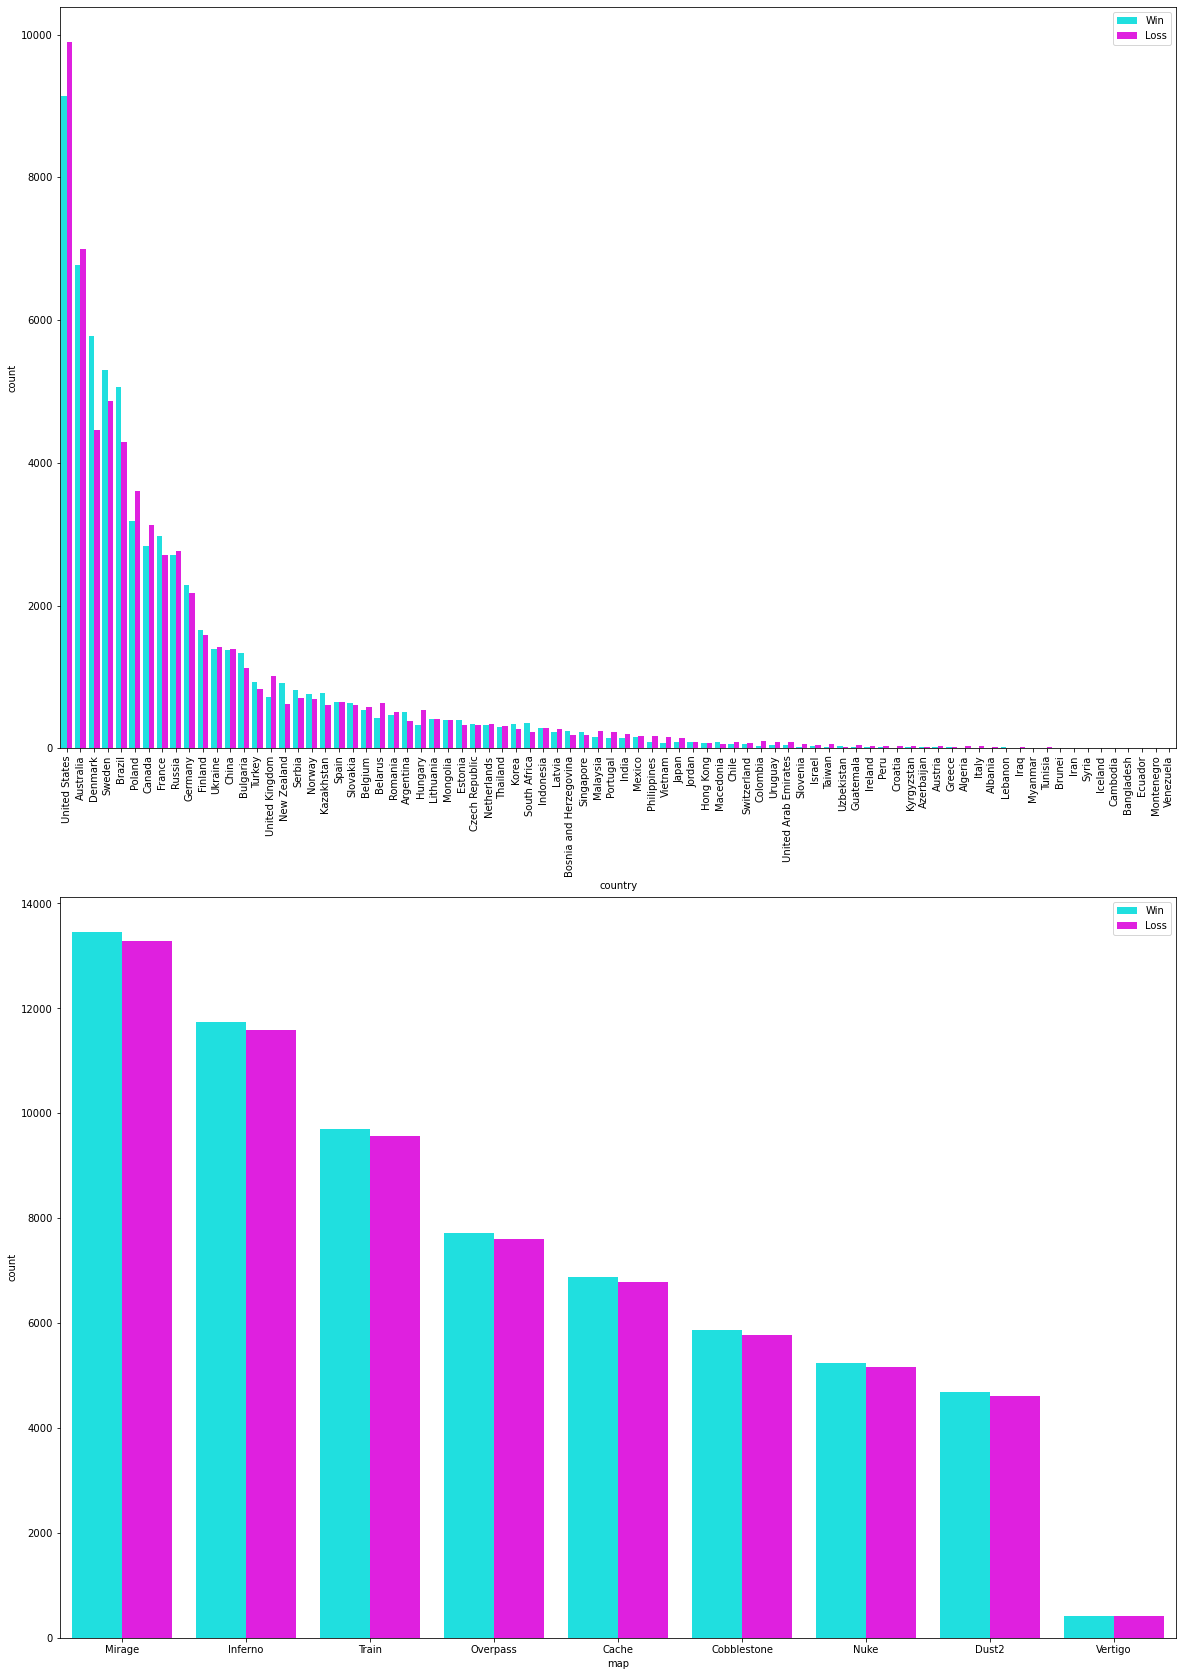

In [21]:
# Side-by-side countplots by 'match_outcome' (categorical feature comparisons).
fig, ax = plt.subplots(2, 1, figsize = (20,30))

colors = ['cyan', 'magenta']

ax[0].set_xticklabels(df_individual['country'], rotation = 90)
sns.countplot(ax = ax[0], x = 'country', hue = 'match_outcome', data = df_individual, order = df_individual['country'].value_counts().index, palette = colors)
ax[0].legend(loc = 'upper right')

sns.countplot(ax = ax[1], x = 'map', hue = 'match_outcome', data = df_individual, order = df_individual['map'].value_counts().index, palette = colors)
ax[1].legend(loc = 'upper right')

The first countplot shows that the majority of players in our data are from the United States, and the largest difference in matches won and lost, grouped by the country a player is from, seems to be for players from Denmark (more wins then losses).

We would expect the second countplot to show equal map counts for the win and loss data, so we should make a note that there is an unexpected/unexplained difference in map counts.

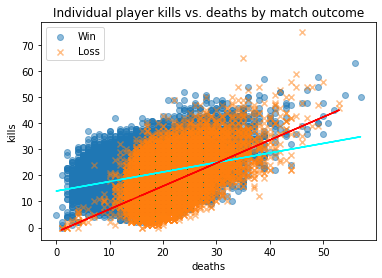

In [22]:
# Create scatterplots to take a closer look at some relationships b/w features.
_ = plt.scatter(x = df_individual_win.deaths, y = df_individual_win.kills, marker = 'o', alpha = 0.5)
_ = plt.scatter(x = df_individual_loss.deaths, y = df_individual_loss.kills, marker = 'x', alpha = 0.5)
_ = plt.xlabel('deaths')
_ = plt.ylabel('kills')
_ = plt.title('Individual player kills vs. deaths by match outcome')
_ = plt.legend(['Win', 'Loss'], loc = 'upper left')
a, b = np.polyfit(df_individual_win.deaths, df_individual_win.kills, 1)
_ = plt.plot(df_individual_win.deaths, a*df_individual_win.deaths+b, color = 'cyan')
a2, b2 = np.polyfit(df_individual_loss.deaths, df_individual_loss.kills, 1)
_ = plt.plot(df_individual_loss.deaths, a2*df_individual_loss.deaths+b2, color = 'red')

The plot above shows that for both win and loss data, as kills increase, so do deaths. This makes sense because more deaths translates to more rounds being played, and therefore more opportunities for kills to be made. The relationship tends to be stronger for the loss data (r=0.47) and the number of deaths increases at a faster rate.

In [ ]:
# Create some more scatterplots of variables with similar/different correlations (comparing win vs. loss) to see if they move in similar/different ways.

In [ ]:
# Form any hypothesis that may be of interest in building our model to answer our questions.
# i.e. Ho: The avg adr in loss data is equal to avg adr in win data, Ha: Not Ho. If we reject Ho then the variable will most likely be useful in predicting match outcomes.
# Note: Look at the distributions of the win and loss data (each, not together). If the distributions are normal probably use a 2 sample t-test. Otherwise, use a non-parametric test (maybe permutation test). If comparing 2 categorical variables use Chi-Squared.

### Individual Player Performance - Combined Win/Loss Data

In [24]:
# Summary statistics (wins and losses combined).
df_individual.describe().T

,count,mean,std,min,25%,50%,75%,max
player_id,130502.0,9.033092e+03,4176.702761,2.0,7433.0,9083.0,11630.0,19995.0
match_id,130502.0,2.319657e+06,10327.619608,2300412.0,2311279.0,2319488.0,2327783.0,2339828.0
event_id,130502.0,3.415114e+03,779.510028,1690.0,2767.0,3374.0,3965.0,5224.0
kills,130502.0,1.772918e+01,6.274175,0.0,13.0,17.0,22.0,75.0
assists,130502.0,4.133753e+00,2.443875,0.0,2.0,4.0,6.0,20.0
deaths,130502.0,1.769030e+01,4.818892,0.0,15.0,18.0,20.0,57.0
hs,130502.0,8.027701e+00,3.868044,0.0,5.0,8.0,10.0,39.0
flash_assists,130502.0,1.013494e+00,1.124346,0.0,0.0,1.0,1.0,13.0
kast,130502.0,6.939720e+01,12.120298,15.8,61.8,70.0,77.8,100.0
kddiff,130502.0,3.888829e-02,7.172407,-26.0,-5.0,0.0,5.0,31.0


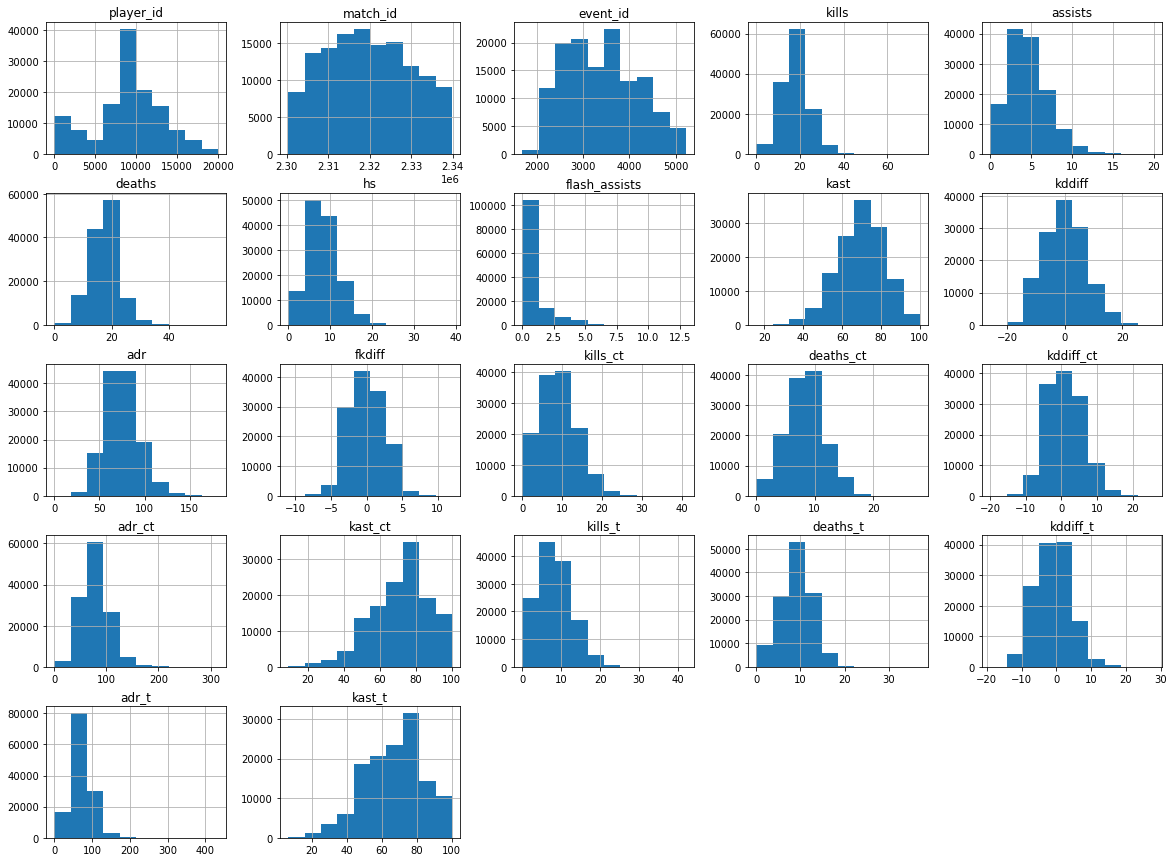

In [25]:
# Histogram for individual features (wins and losses combined).
_ = df_individual.hist(bins = 10, figsize = (20,15))

<AxesSubplot:>

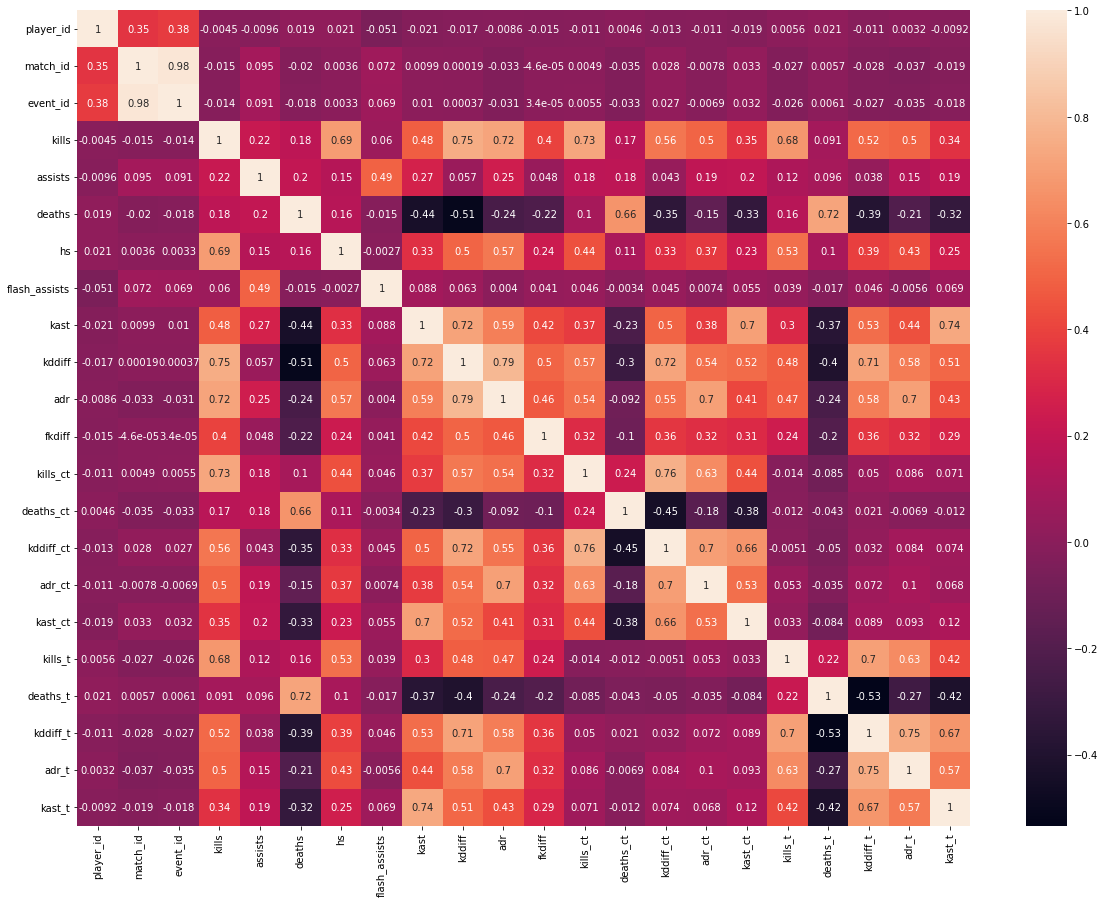

In [26]:
# Correlation heatmap (wins and losses combined).
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_individual.corr(), annot = True)

## Taking a Closer Look at the Team Data

### Team Performance - Win

In [27]:
# Summary statistics for team win features.
df_team_win.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,13337.0,2.319425e+06,10486.403220,2299001.00,2.310948e+06,2319395.00,2327738.00,2339828.00
kills,13337.0,1.971268e+01,2.883408,3.80,1.800000e+01,19.40,20.60,49.80
assists,13337.0,4.594047e+00,1.314003,0.60,3.600000e+00,4.40,5.40,12.00
deaths,13337.0,1.561062e+01,4.729261,1.80,1.220000e+01,15.40,18.40,54.00
hs,13337.0,8.793387e+00,1.671542,0.60,7.600000e+00,8.60,9.80,26.80
flash_assists,13337.0,1.124083e+00,0.614087,0.00,8.000000e-01,1.00,1.40,5.00
kast,13337.0,7.638694e+01,6.202710,54.66,7.200000e+01,75.84,80.02,98.76
kddiff,13337.0,4.102062e+00,2.718713,-7.40,2.200000e+00,4.00,6.00,12.20
adr,13337.0,8.168167e+01,6.251331,55.74,7.714000e+01,81.02,85.82,99.96
fkdiff,13337.0,7.024593e-01,0.997116,-3.60,0.000000e+00,0.80,1.40,4.00


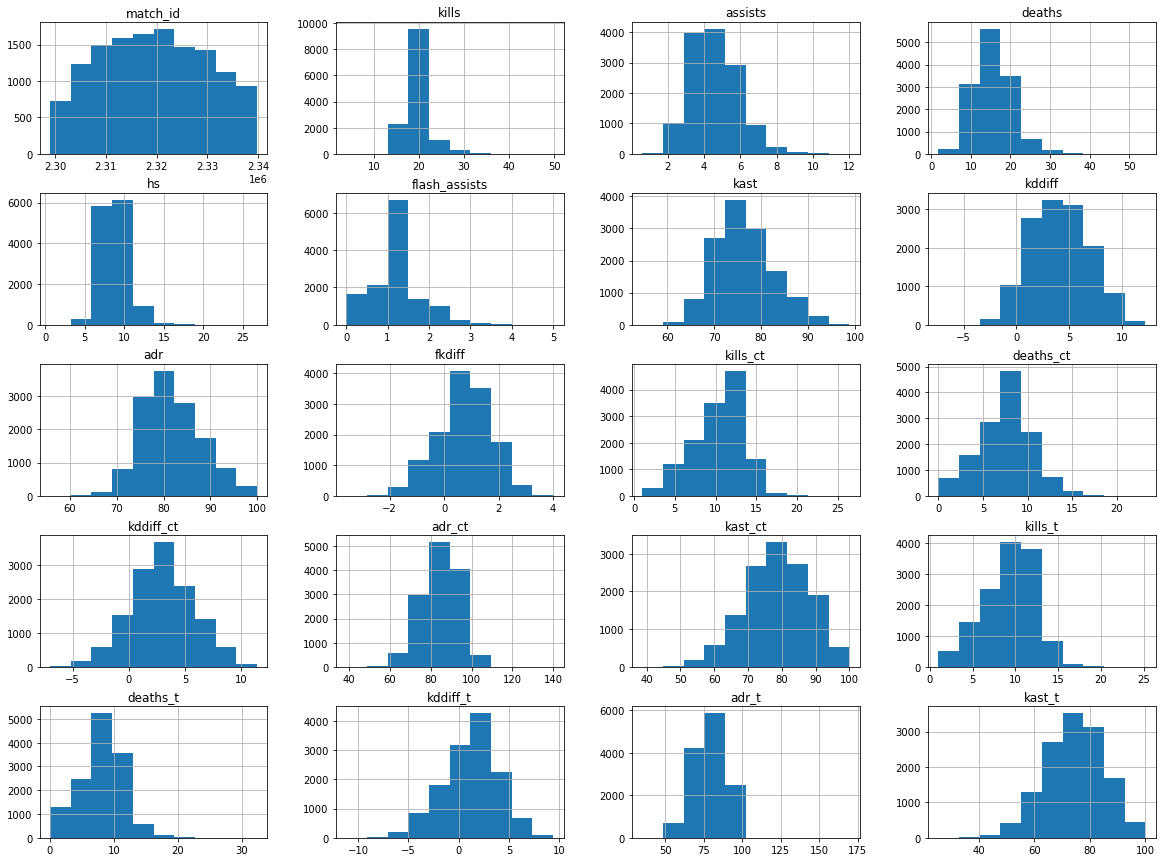

In [28]:
# Histogram for team win features.
_ = df_team_win.hist(bins = 10, figsize = (20,15))

Now we want to look closer at some of the categorical features in our data. We'll look at 'map'. We are not interested in 'date', 'team', 'opponent', 'event_name', or 'match_outcome'. **Note:** While 'team' and 'opponent' likely impact the outcome of a match, we are not interested in how strength level of teams/opponents impact match outcomes, but rather just the match statistics.

<AxesSubplot:xlabel='map', ylabel='count'>

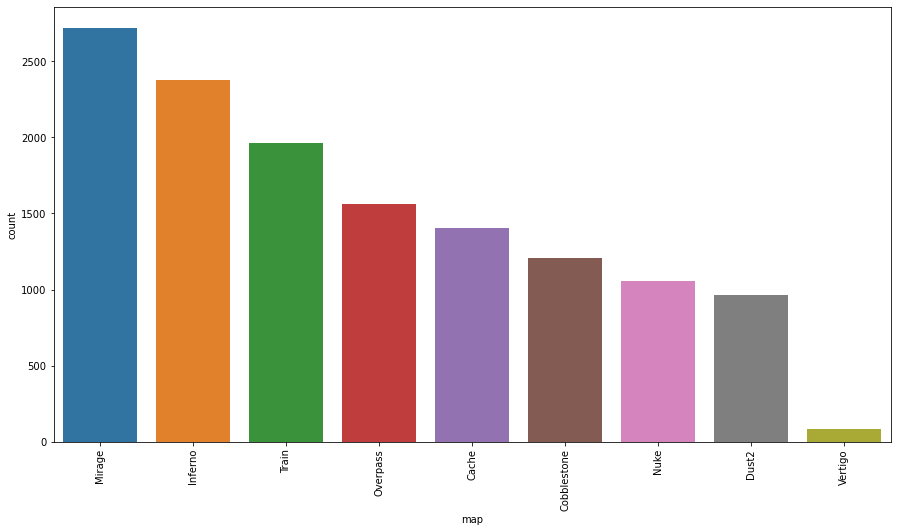

In [29]:
# Create a copy of the team win dataframe only containing the categorical features.
df_team_win_cat = df_team_win.select_dtypes(include = 'object').copy()

# Countplot for the 'map' feature.
fig, ax = plt.subplots(figsize = (15,8))
plt.xticks(rotation = 90)
sns.countplot(data = df_team_win_cat, x = 'map', order = df_team_win_cat['map'].value_counts().index)

<AxesSubplot:>

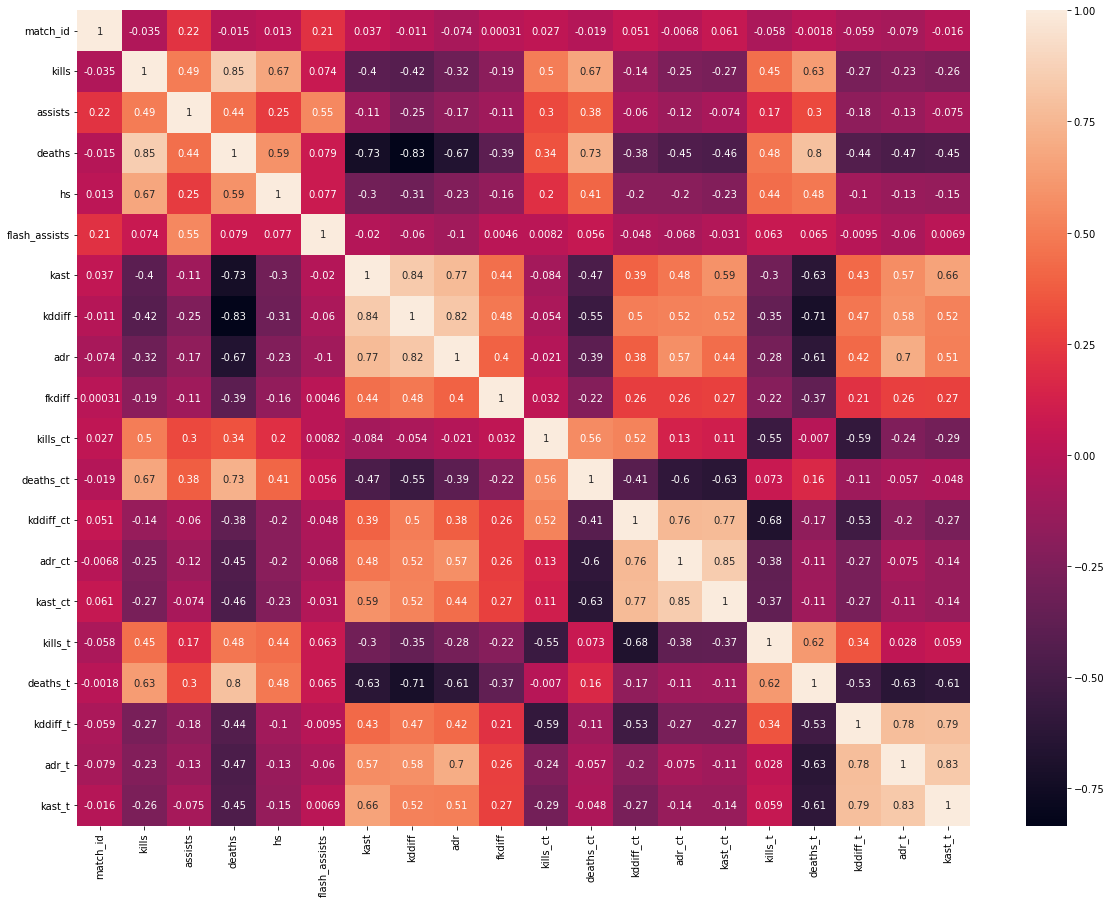

In [30]:
# Correlation heatmap
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_team_win.corr(), annot = True)

In [31]:
# Create scatterplots to take a closer look at any relationship that may be of interest.

### Team Performance - Loss

In [32]:
# Summary statistics for team loss features.
df_team_loss.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,13336.0,2.319426e+06,10486.715680,2299001.00,2310947.75,2319395.50,2.327739e+06,2339828.00
kills,13336.0,1.557370e+01,4.724566,1.80,12.20,15.40,1.840000e+01,54.00
assists,13336.0,3.624295e+00,1.445996,0.20,2.60,3.40,4.400000e+00,13.40
deaths,13336.0,1.973799e+01,2.894245,3.80,18.00,19.40,2.060000e+01,49.80
hs,13336.0,7.174955e+00,2.190693,0.60,5.60,7.00,8.400000e+00,23.20
flash_assists,13336.0,8.963257e-01,0.552134,0.00,0.60,1.00,1.000000e+00,5.80
kast,13336.0,6.203210e+01,7.398231,30.00,57.60,63.00,6.744000e+01,84.76
kddiff,13336.0,-4.164292e+00,2.713745,-12.20,-6.00,-4.00,-2.200000e+00,7.40
adr,13336.0,6.748852e+01,6.807381,31.86,63.60,68.50,7.236000e+01,87.58
fkdiff,13336.0,-7.092981e-01,0.996834,-4.00,-1.40,-0.80,0.000000e+00,3.60


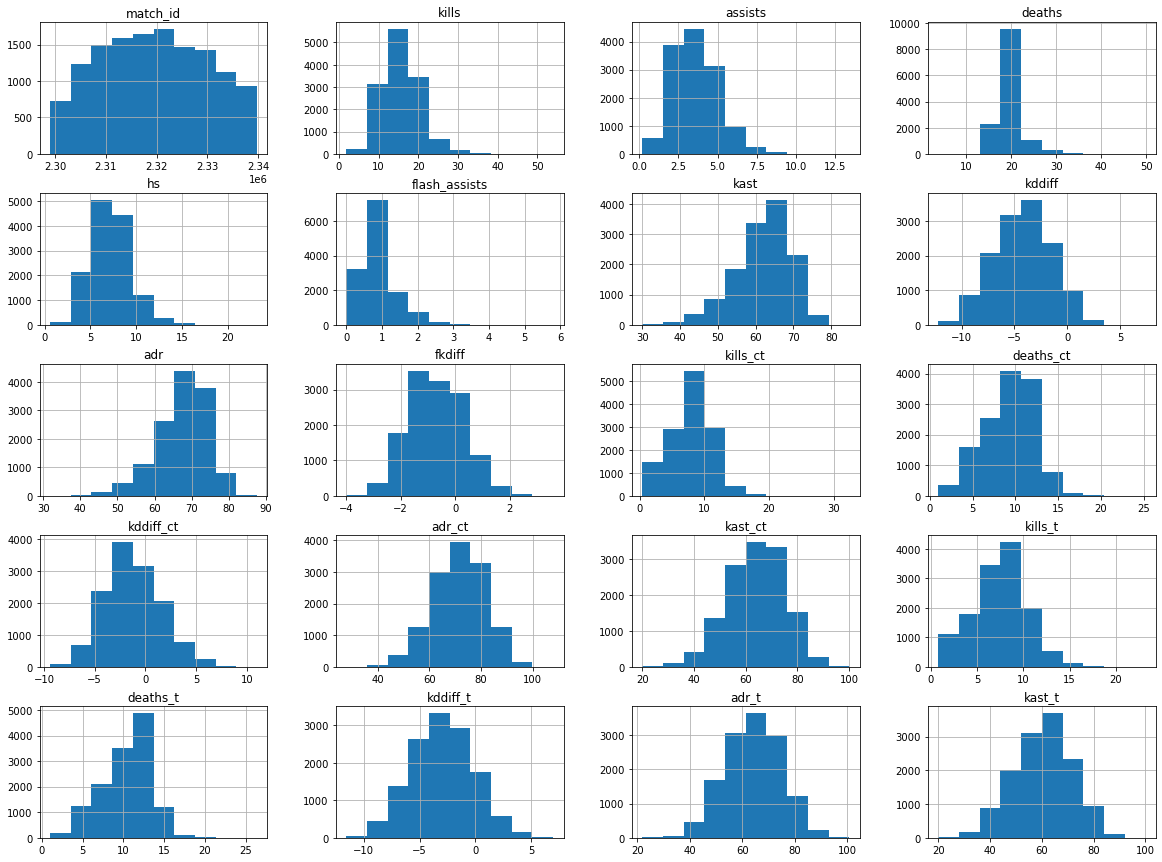

In [33]:
# Histogram for team loss features.
_ = df_team_loss.hist(bins = 10, figsize = (20,15))

Now we want to look closer at some of the categorical features in our data. We'll look at 'map'. We are not interested in 'date', 'team', 'opponent', 'event_name', or 'match_outcome'. **Note:** While 'team' and 'opponent' likely impact the outcome of a match, we are not interested in how strength level of teams/opponents impact match outcomes, but rather just the match statistics.

<AxesSubplot:xlabel='map', ylabel='count'>

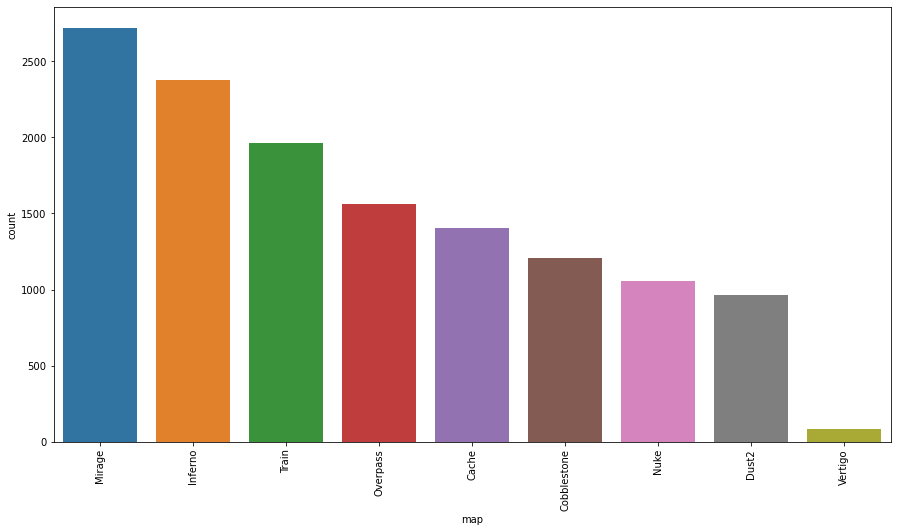

In [34]:
# Create a copy of the team loss dataframe only containing the categorical features.
df_team_loss_cat = df_team_loss.select_dtypes(include = 'object').copy()

# Countplot for the 'map' feature.
fig, ax = plt.subplots(figsize = (15,8))
plt.xticks(rotation = 90)
sns.countplot(data = df_team_loss_cat, x = 'map', order = df_team_loss_cat['map'].value_counts().index)

<AxesSubplot:>

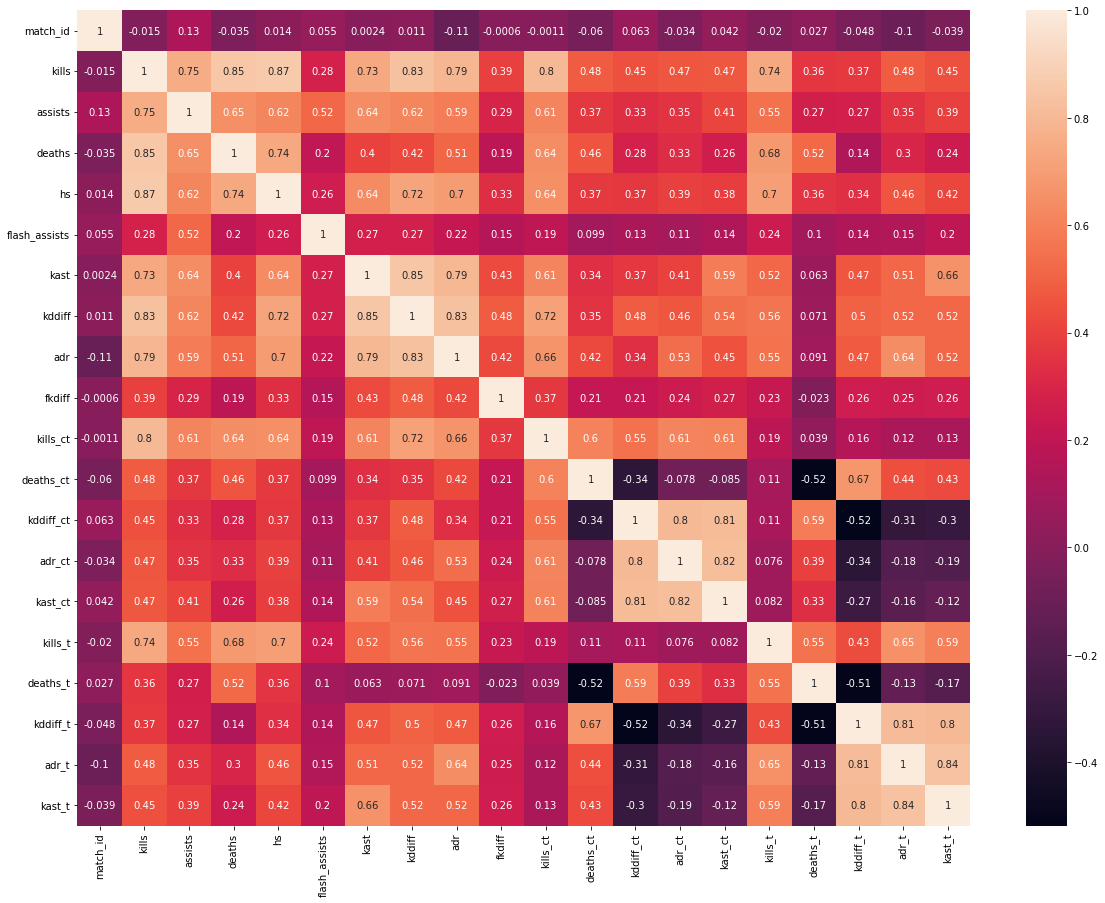

In [35]:
# Correlation heatmap
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_team_loss.corr(), annot = True)

In [36]:
# Create scatterplots to take a closer look at any relationship that may be of interest.

### Team Performance - Boxplot/Countplot/Scatterplot Comparisons

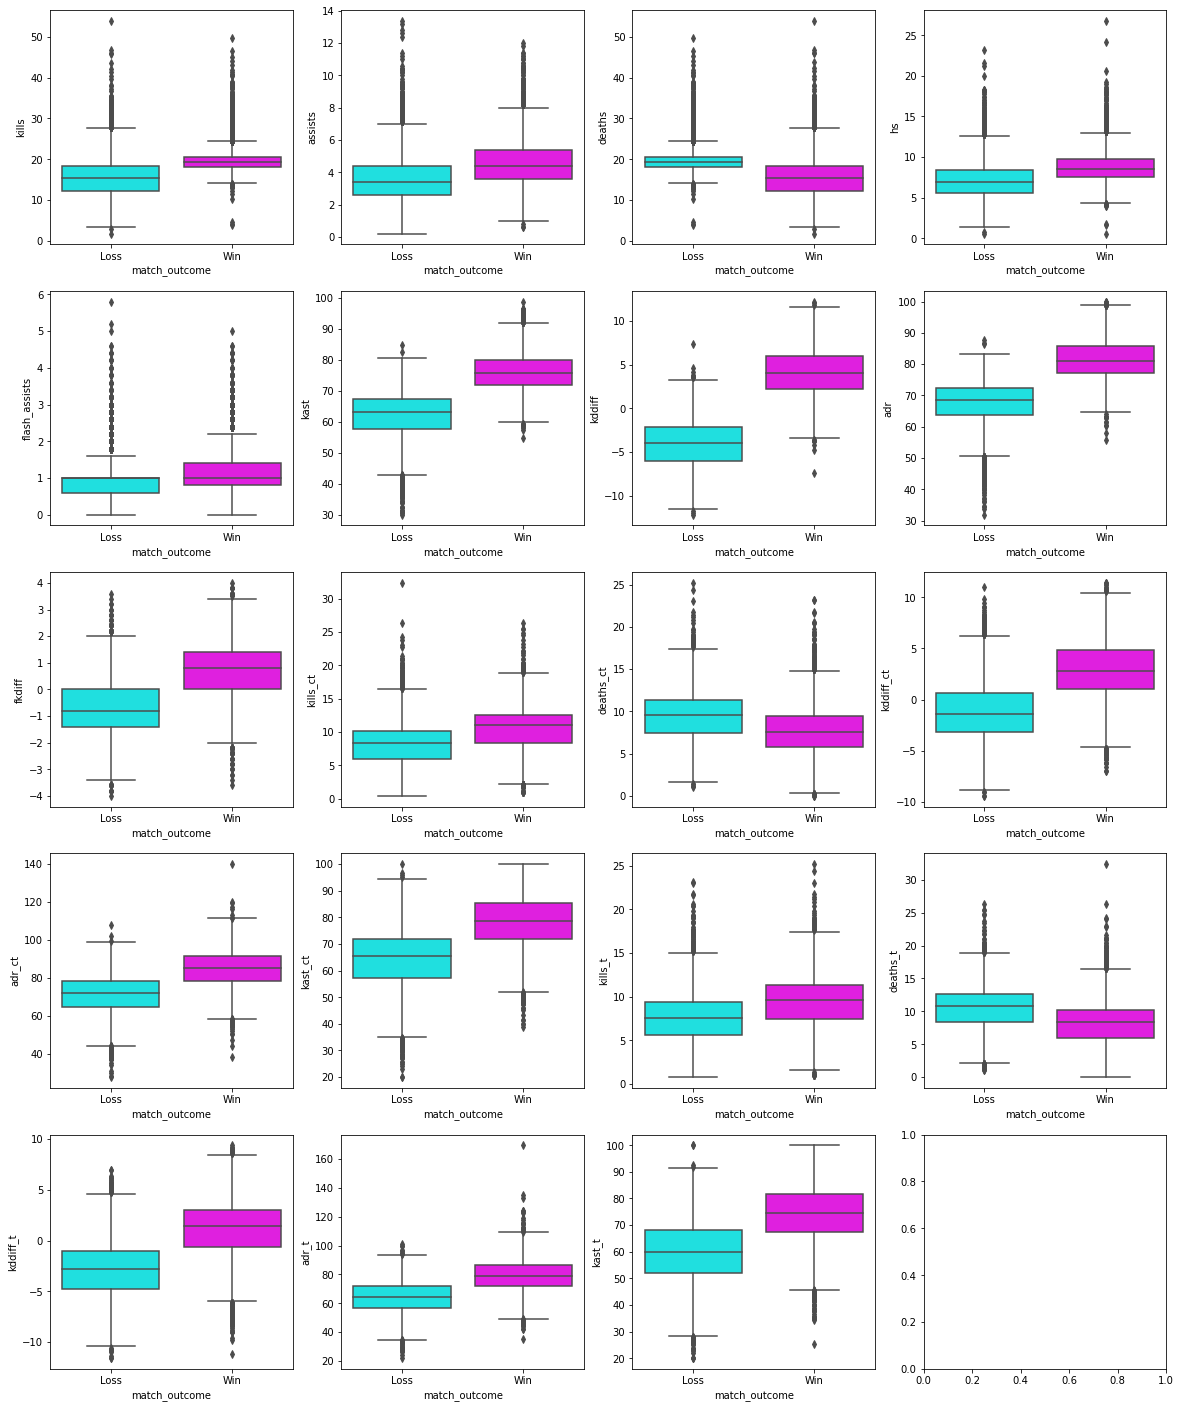

In [37]:
# Side-by-side boxplots by 'match_outcome' (numerical feature comparisons).
fig, ax = plt.subplots(5, 4, figsize = (20,25))

colors = ['cyan', 'magenta']
_ = sns.boxplot(ax = ax[0,0], x = 'match_outcome', y = 'kills', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[0,1], x = 'match_outcome', y = 'assists', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[0,2], x = 'match_outcome', y = 'deaths', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[0,3], x = 'match_outcome', y = 'hs', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[1,0], x = 'match_outcome', y = 'flash_assists', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[1,1], x = 'match_outcome', y = 'kast', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[1,2], x = 'match_outcome', y = 'kddiff', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[1,3], x = 'match_outcome', y = 'adr', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[2,0], x = 'match_outcome', y = 'fkdiff', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[2,1], x = 'match_outcome', y = 'kills_ct', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[2,2], x = 'match_outcome', y = 'deaths_ct', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[2,3], x = 'match_outcome', y = 'kddiff_ct', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[3,0], x = 'match_outcome', y = 'adr_ct', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[3,1], x = 'match_outcome', y = 'kast_ct', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[3,2], x = 'match_outcome', y = 'kills_t', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[3,3], x = 'match_outcome', y = 'deaths_t', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[4,0], x = 'match_outcome', y = 'kddiff_t', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[4,1], x = 'match_outcome', y = 'adr_t', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[4,2], x = 'match_outcome', y = 'kast_t', data = df_team, palette = colors)

In [38]:
# Make a markdown cell and comment on some of the important information portrayed in the boxplots above. Also mention outliers and if they all make sense. If not, investigate the extreme values.

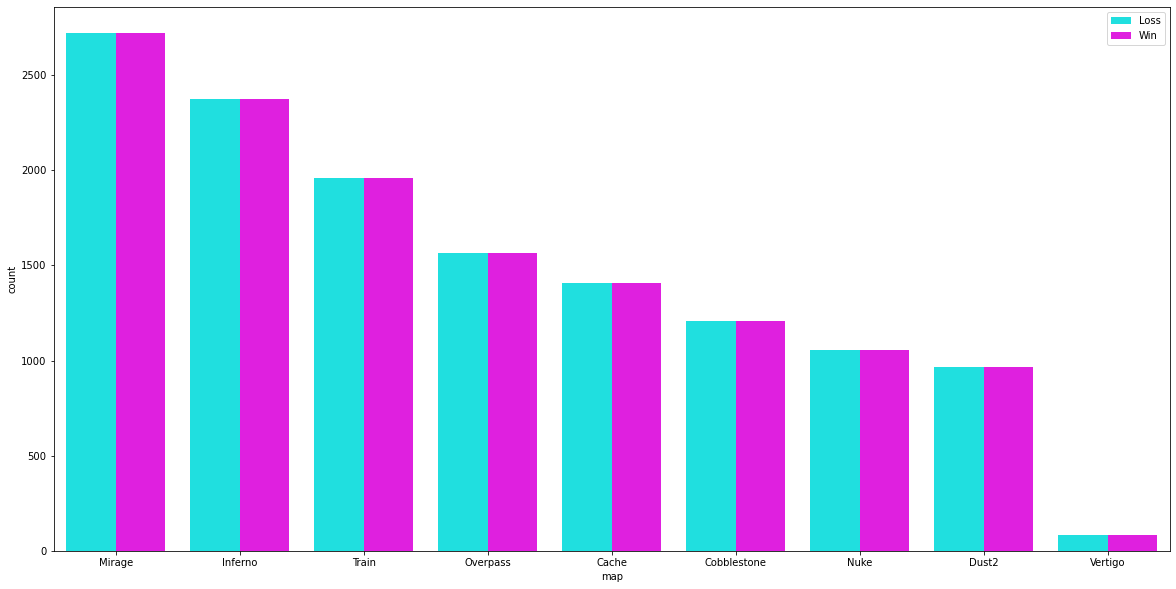

In [39]:
# Side-by-side countplots by 'match_outcome' (categorical feature comparisons).
fig, ax = plt.subplots(figsize = (20,10))

colors = ['cyan', 'magenta']

sns.countplot(x = 'map', hue = 'match_outcome', data = df_team, order = df_team['map'].value_counts().index, palette = colors)
plt.legend(loc = 'upper right')

The countplot is what we expect: The map counts for the win data are the same as the loss data. Since during the data wrangling stage we aggregated over the teams and match_ids, this can explain why we do not see the minor difference that we saw in the earlier, individual comparison.

In [40]:
# Create some more scatterplots of variables with similar/different correlations (comparing win vs. loss) to see if they move in similar/different ways.

In [41]:
# Form any hypothesis that may be of interest in building our model to answer our questions.
# i.e. Ho: The avg adr in loss data is equal to avg adr in win data, Ha: Not Ho. If we reject Ho then the variable will most likely be useful in predicting match outcomes.
# Note: Look at the distributions of the win and loss data (each, not together). If the distributions are normal probably use a 2 sample t-test. Otherwise, use a non-parametric test (maybe permutation test). If comparing 2 categorical variables use Chi-Squared.

### Team Performance - Combined Win/Loss Data

In [42]:
# Summary statistics (wins and losses combined).
df_team.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,26673.0,2.319426e+06,10486.362861,2299001.00,2310948.00,2.319395e+06,2327738.00,2339828.00
kills,26673.0,1.764327e+01,4.427177,1.80,15.40,1.820000e+01,20.00,54.00
assists,26673.0,4.109189e+00,1.464168,0.20,3.00,4.000000e+00,5.00,13.40
deaths,26673.0,1.767423e+01,4.430568,1.80,15.40,1.820000e+01,20.00,54.00
hs,26673.0,7.984201e+00,2.109803,0.60,6.60,8.000000e+00,9.20,26.80
flash_assists,26673.0,1.010209e+00,0.594924,0.00,0.60,1.000000e+00,1.20,5.80
kast,26673.0,6.920979e+01,9.905501,30.00,62.98,6.958000e+01,76.00,98.76
kddiff,26673.0,-3.096015e-02,4.945849,-12.20,-4.00,0.000000e+00,4.00,12.20
adr,26673.0,7.458536e+01,9.647348,31.86,68.40,7.462000e+01,81.06,99.96
fkdiff,26673.0,-3.392944e-03,1.221559,-4.00,-0.80,0.000000e+00,0.80,4.00


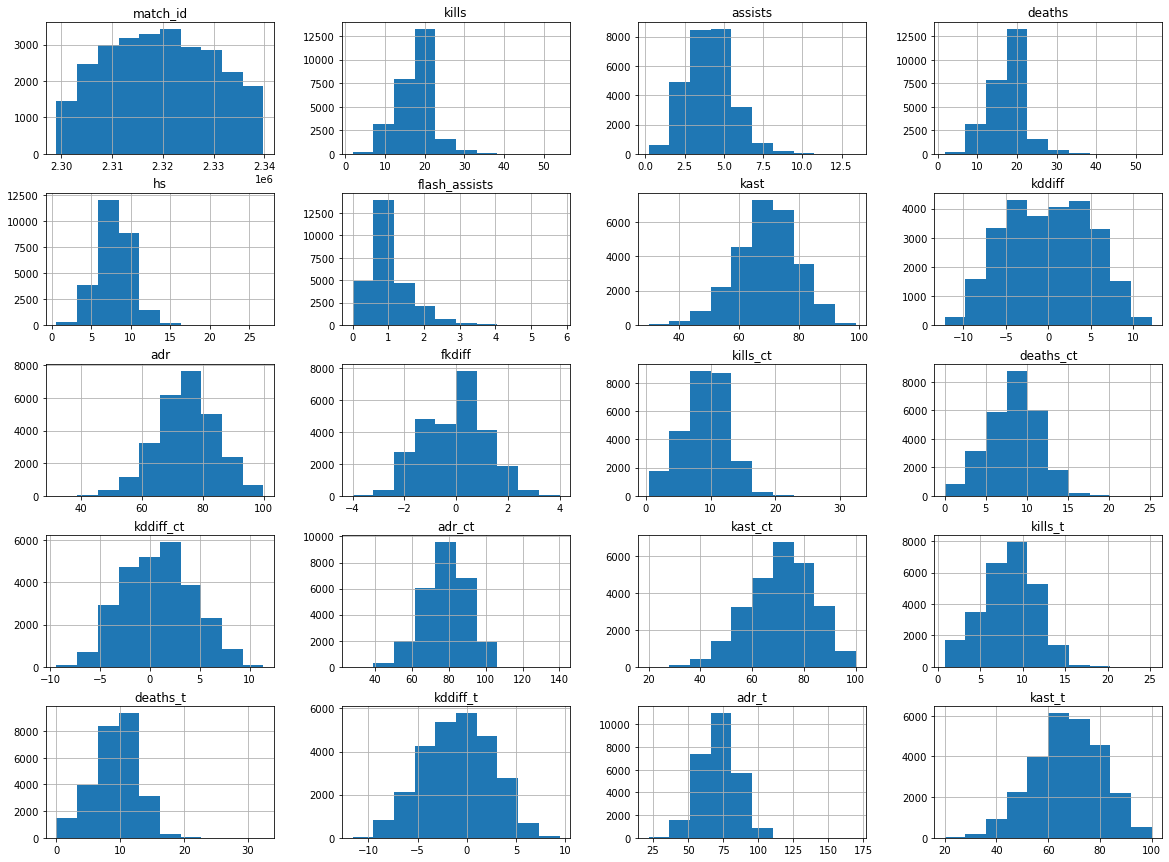

In [43]:
# Histogram for team features (wins and losses combined).
_ = df_team.hist(bins = 10, figsize = (20,15))

<AxesSubplot:>

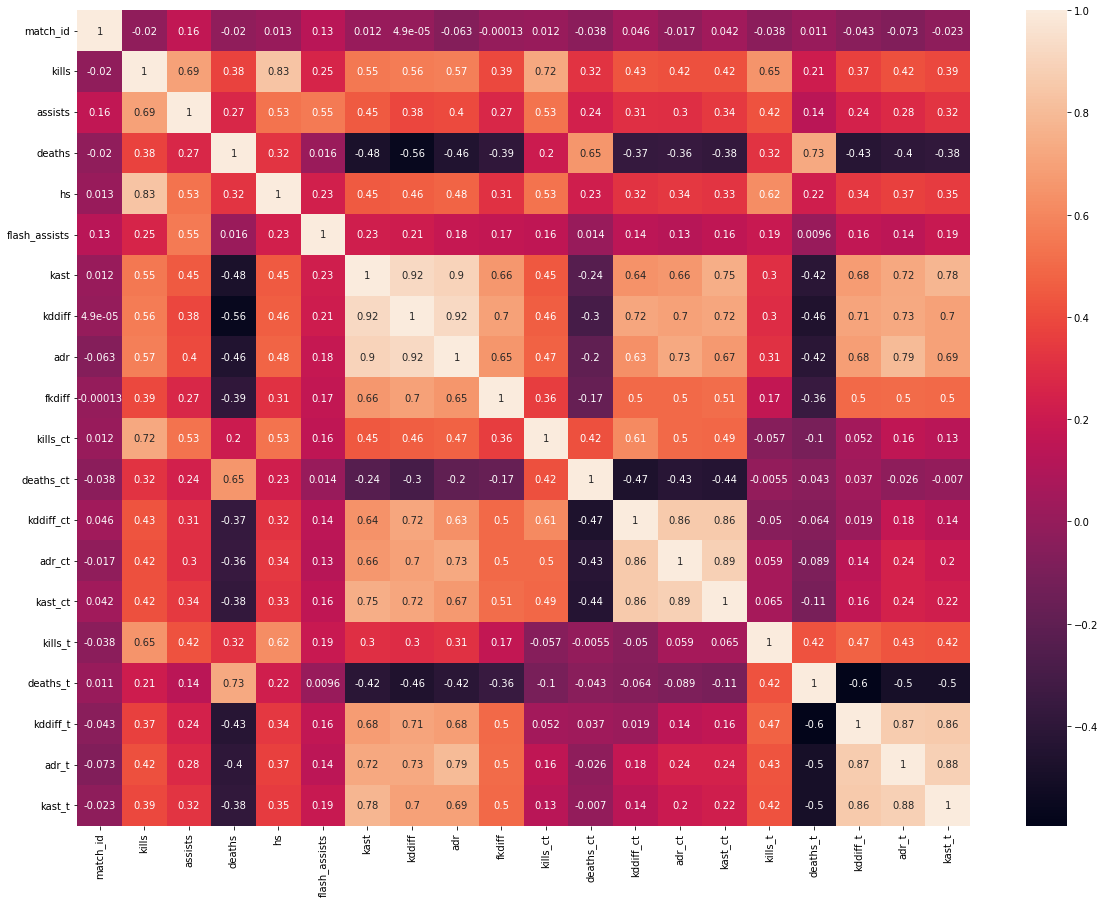

In [44]:
# Correlation heatmap (wins and losses combined).
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_team.corr(), annot = True)